In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [2]:
df = pd.read_csv('train_pronto.csv')

In [3]:
df.head()

,Unnamed: 0,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,weekend,afternoon,morning,evening,night,cat_weekend,cat_weekday
0,0,20.2900,22.2900,0.00,439.00,0.003275,0,weekday,1,0,0,0,0,1
1,1,21.9725,30.0725,419.00,975.25,0.004912,1,weekday,1,0,0,0,0,1
2,2,21.1500,19.5500,0.00,497.00,0.003028,0,weekday,0,0,1,0,0,1
3,3,22.2000,34.1725,433.00,1682.75,0.005667,1,weekday,1,0,0,0,0,1
4,4,24.1000,24.1000,181.75,681.25,0.004475,0,weekday,1,0,0,0,0,1


In [4]:
df.drop(['Unnamed: 0', 'weekend'], axis = 1, inplace = True)

In [5]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,afternoon,morning,evening,night,cat_weekend,cat_weekday
count,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.0,16448.0
mean,20.909264,27.667679,130.922331,690.417678,0.004231,0.231761,0.239908,0.235105,0.219723,0.305265,0.0,1.0
std,1.052940,4.988453,210.055475,310.628807,0.000767,0.421970,0.427040,0.424077,0.414071,0.460534,0.0,0.0
min,19.000000,16.745000,0.000000,413.000000,0.002678,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,20.200000,24.500000,0.000000,460.937500,0.003721,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,20.700000,27.315000,0.000000,565.500000,0.004292,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,21.533333,31.290000,305.000000,804.500000,0.004834,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.0
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0


## LINEAR REGRESSION

In [8]:
y_name = 'Occupancy'
attributes = [col for col in df.columns if col != y_name]
X = df[attributes].values
y = df[y_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [9]:
reg = LinearRegression()
num = []
for i in range(2,20):
    num.append(i)
scoring_mae = []
scoring_r2 = []
scoring_mse = []
for j in num:
    cv_score_mae = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_absolute_error').mean()
    cv_score_mae = -1*cv_score_mae
    scoring_mae.append(cv_score_mae)
    cv_score_r2 = cross_val_score(reg, X, y, cv = j, scoring = 'r2').mean()
    scoring_r2.append(cv_score_r2)
    cv_score_mse = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_squared_error').mean()
    cv_score_mse = -1*cv_score_mse
    scoring_mse.append(cv_score_mse)


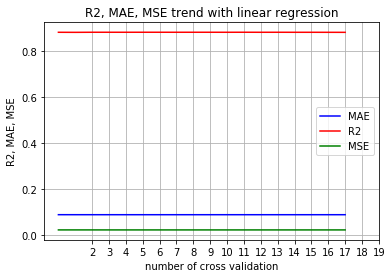

In [10]:
plt.plot(scoring_mae, color = 'b', label = 'MAE')
plt.plot(scoring_r2, color = 'r', label = 'R2')
plt.plot(scoring_mse, color = 'g', label = 'MSE')
plt.xlabel('number of cross validation')
plt.ylabel('R2, MAE, MSE')
plt.legend()
plt.title('R2, MAE, MSE trend with linear regression')
plt.grid()
plt.xticks(num)
plt.show()

In [11]:
reg = reg.fit(X_train, y_train)

In [12]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-2.65454200e-01 -1.04737363e-01  2.06580142e-03  1.48412057e-04
  6.84683779e+02  4.37312768e-02 -6.17557587e-02  1.92210647e-02
 -1.19658435e-03  0.00000000e+00  0.00000000e+00]
Intercept: 
 5.411273184402051


In [13]:
y_pred = reg.predict(X_test)

In [14]:
y_pred.shape

(5428,)

In [15]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.879
MSE: 0.022
MAE: 0.088


## CROSS VALIDATION 

In [16]:
scores = cross_val_score(reg, X, y, cv=5, scoring = 'r2')
scores.mean()

0.8825632240033041

In [17]:
X_train.T[4].min()

0.00267789158376215

In [18]:
X_train.T[4].max()

0.00647601323671025

In [19]:
df.HumidityRatio.min()

0.00267789158376215

In [20]:
df.HumidityRatio.max()

0.00647601323671025

## LINEAR REGRESSION IN TWO DIMENSIONS FOR EACH ATTRIBUTE AND OCCUPANCY

### TEMPERATURE

In [21]:
reg = LinearRegression()
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.298
MSE: 0.125
MAE: 0.270


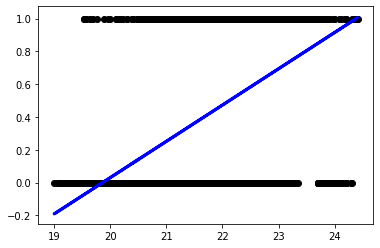

In [22]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY

In [23]:
reg = LinearRegression()
reg.fit(X_train.T[1].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[1].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.002
MSE: 0.178
MAE: 0.356


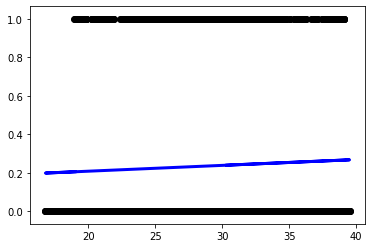

In [24]:
plt.scatter(X_test.T[1], y_test,  color='black')
plt.plot(X_test.T[1], y_pred, color='blue', linewidth=3)
plt.show()

### LIGHT

In [25]:
reg = LinearRegression()
reg.fit(X_train.T[2].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[2].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.838
MSE: 0.029
MAE: 0.084


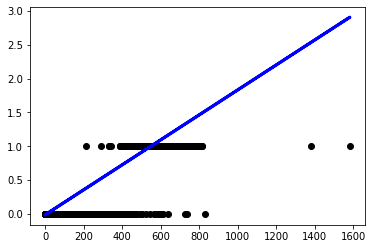

In [26]:
plt.scatter(X_test.T[2], y_test,  color='black')
plt.plot(X_test.T[2], y_pred, color='blue', linewidth=3)
plt.show()

### CO2

In [27]:
reg = LinearRegression()
reg.fit(X_train.T[3].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[3].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.252
MSE: 0.133
MAE: 0.269


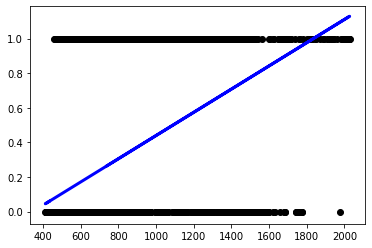

In [28]:
plt.scatter(X_test.T[3], y_test,  color='black')
plt.plot(X_test.T[3], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY RATIO

In [29]:
reg = LinearRegression()
reg.fit(X_train.T[4].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[4].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.066
MSE: 0.167
MAE: 0.334


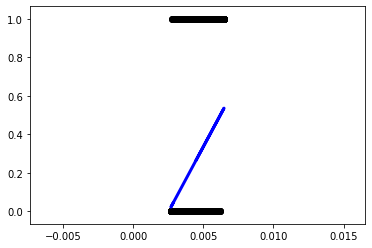

In [30]:
plt.scatter(X_test.T[4], y_test,  color='black')
plt.plot(X_test.T[4], y_pred, color='blue', linewidth=3)
plt.show()

## LASSO

In [31]:
reg = Lasso()
num = []
for i in range(2,20):
    num.append(i)
scoring_mae = []
scoring_r2 = []
scoring_mse = []
for j in num:
    cv_score_mae = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_absolute_error').mean()
    cv_score_mae = -1*cv_score_mae
    scoring_mae.append(cv_score_mae)
    cv_score_r2 = cross_val_score(reg, X, y, cv = j, scoring = 'r2').mean()
    scoring_r2.append(cv_score_r2)
    cv_score_mse = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_squared_error').mean()
    cv_score_mse = -1*cv_score_mse
    scoring_mse.append(cv_score_mse)

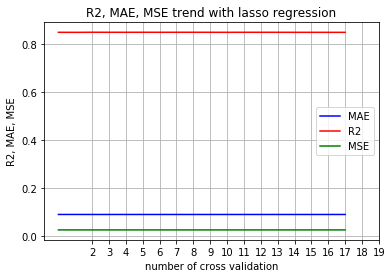

In [32]:
plt.plot(scoring_mae, color = 'b', label = 'MAE')
plt.plot(scoring_r2, color = 'r', label = 'R2')
plt.plot(scoring_mse, color = 'g', label = 'MSE')
plt.xlabel('number of cross validation')
plt.ylabel('R2, MAE, MSE')
plt.legend()
plt.title('R2, MAE, MSE trend with lasso regression')
plt.xticks(num)
plt.grid()
plt.show()

In [33]:
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.          0.          0.00172466  0.00014687  0.          0.
 -0.          0.          0.          0.          0.        ]
Intercept: 
 -0.09510244159897902


In [34]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.847
MSE: 0.027
MAE: 0.092


## CROSS VALIDATION

In [35]:
scores = cross_val_score(reg, X, y, cv=5, scoring = 'r2')
scores.mean()

0.8507136898845177

### LASSO REGRESSION IN TWO DIMENSIONS FOR EACH ATTRIBUTE AND OCCUPANCY

#### TEMPERATURE

In [36]:
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.178
MAE: 0.356


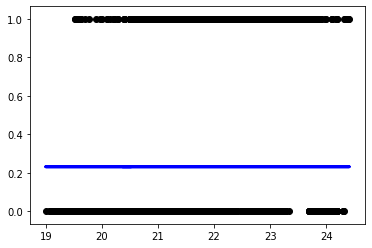

In [37]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY

In [38]:
reg.fit(X_train.T[1].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[1].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.178
MAE: 0.356


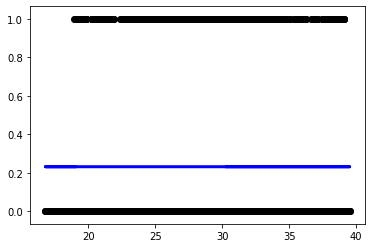

In [39]:
plt.scatter(X_test.T[1], y_test,  color='black')
plt.plot(X_test.T[1], y_pred, color='blue', linewidth=3)
plt.show()

### LIGHT

In [40]:
reg.fit(X_train.T[2].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[2].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.838
MSE: 0.029
MAE: 0.083


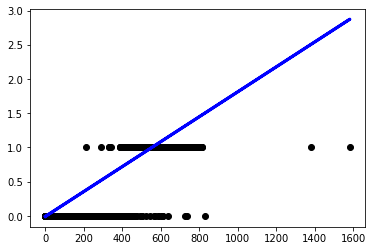

In [41]:
plt.scatter(X_test.T[2], y_test,  color='black')
plt.plot(X_test.T[2], y_pred, color='blue', linewidth=3)
plt.show()

### CO2

In [42]:
reg.fit(X_train.T[3].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[3].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.252
MSE: 0.133
MAE: 0.270


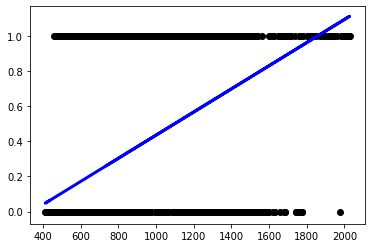

In [43]:
plt.scatter(X_test.T[3], y_test,  color='black')
plt.plot(X_test.T[3], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY RATIO

In [44]:
reg.fit(X_train.T[4].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[4].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.178
MAE: 0.356


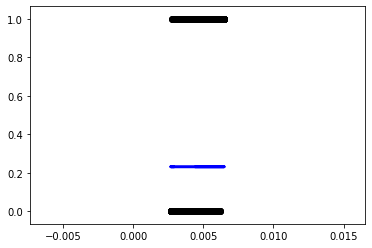

In [45]:
plt.scatter(X_test.T[4], y_test,  color='black')
plt.plot(X_test.T[4], y_pred, color='blue', linewidth=3)
plt.show()

## RIDGE REGRESSION

In [46]:
reg = Ridge()
num = []
for i in range(2,20):
    num.append(i)
scoring_mae = []
scoring_r2 = []
scoring_mse = []
for j in num:
    cv_score_mae = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_absolute_error').mean()
    cv_score_mae = -1*cv_score_mae
    scoring_mae.append(cv_score_mae)
    cv_score_r2 = cross_val_score(reg, X, y, cv = j, scoring = 'r2').mean()
    scoring_r2.append(cv_score_r2)
    cv_score_mse = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_squared_error').mean()
    cv_score_mse = -1*cv_score_mse
    scoring_mse.append(cv_score_mse)

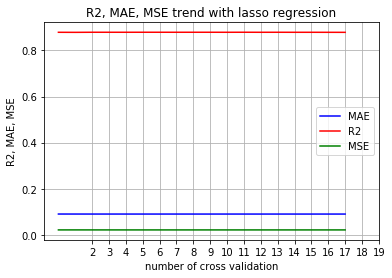

In [47]:
plt.plot(scoring_mae, color = 'b', label = 'MAE')
plt.plot(scoring_r2, color = 'r', label = 'R2')
plt.plot(scoring_mse, color = 'g', label = 'MSE')
plt.xlabel('number of cross validation')
plt.ylabel('R2, MAE, MSE')
plt.legend()
plt.title('R2, MAE, MSE trend with lasso regression')
plt.xticks(num)
plt.grid()
plt.show()

In [48]:
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.09671047 -0.0016945   0.00208315  0.00019526  0.01108312  0.05404567
 -0.07261642  0.02089409 -0.00232335  0.          0.        ]
Intercept: 
 1.8939118639851609


In [49]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.875
MSE: 0.022
MAE: 0.090


## CROSS VALIDATION

In [50]:
scores = cross_val_score(reg, X, y, cv=3, scoring = 'r2')
scores.mean()

0.878251939397163

## RIDGE REGRESSION IN TWO DIMENSIONS FOR EACH ATTRIBUTE AND OCCUPANCY

### TEMPERATURE

In [51]:
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.298
MSE: 0.125
MAE: 0.270


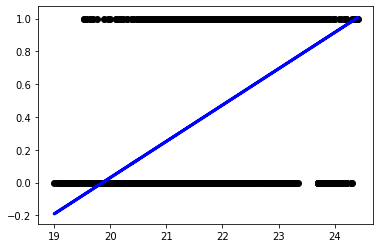

In [52]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY

In [53]:
reg.fit(X_train.T[1].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[1].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.002
MSE: 0.178
MAE: 0.356


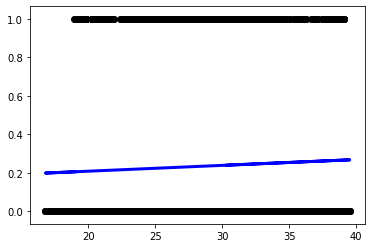

In [54]:
plt.scatter(X_test.T[1], y_test,  color='black')
plt.plot(X_test.T[1], y_pred, color='blue', linewidth=3)
plt.show()

### LIGHT

In [55]:
reg.fit(X_train.T[2].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[2].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.838
MSE: 0.029
MAE: 0.084


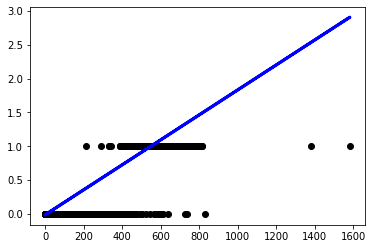

In [56]:
plt.scatter(X_test.T[2], y_test,  color='black')
plt.plot(X_test.T[2], y_pred, color='blue', linewidth=3)
plt.show()

### CO2

In [57]:
reg.fit(X_train.T[3].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[3].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.252
MSE: 0.133
MAE: 0.269


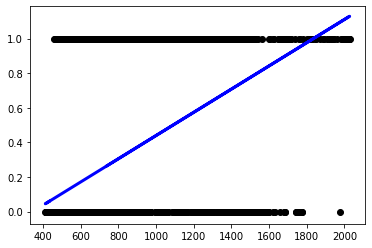

In [58]:
plt.scatter(X_test.T[3], y_test,  color='black')
plt.plot(X_test.T[3], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY RATIO

In [59]:
reg.fit(X_train.T[4].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[4].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.001
MSE: 0.178
MAE: 0.356


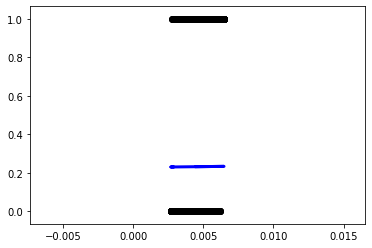

In [60]:
plt.scatter(X_test.T[4], y_test,  color='black')
plt.plot(X_test.T[4], y_pred, color='blue', linewidth=3)
plt.show()